Zunächst muss von Open AI die GYM Bibliothek installiert werden. Am besten nutzt man dazu eine Virtuelle Umgebung mit Python 3.8. Diese kann mann z.B. mittels Conda wie folgt einrichten.

```
conda create --name mygym python=3.8
conda activate mygym
```

Anschließend können die notwendigen Pakete installiert werden.

```
pip install stable-baselines3
pip install ipywidgets
pip install gym[toy_text]
```

> GGf. muss anschließen der Kernel noch einmal neu gestartet werden!

State: (412, {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 0, 0], dtype=int8)})
412


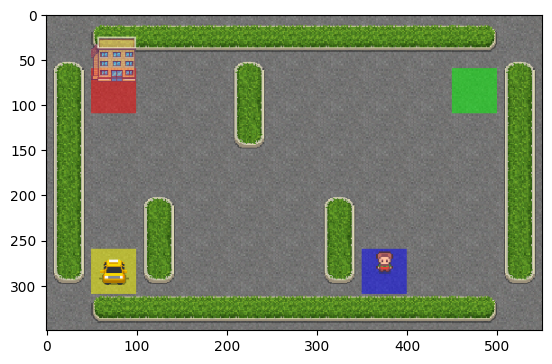

In [16]:
import matplotlib.pyplot as plt 
import gymnasium as gym
import numpy as np
import time
from IPython.display import clear_output




#env = gym.make("Taxi-v3").env
env = gym.make("Taxi-v3",render_mode="rgb_array")
state=env.reset()
env.state=182

# Wähle eine zufällige Aktion aus der Action-Space
#action = env.action_space.sample()

# Führe die Aktion durch und hole den nächsten Zustand, die Belohnung und ob das Spiel vorbei ist
#next_state, reward, done, info = env.step(action)

# Gib Informationen zur Umgebung aus
print("State:", state)
#print("Next State:", next_state)
#print("Action:", action)
#print("Reward:", reward)
#print("Done:", done)
#print("Info:", info)
ar = env.render()
plt.imshow(ar)
print(env.s)

    
    



Es sollte folgende Environment dargestellt werden:

![Taxi Environment](docs/images/taxienv.png)

Der gelb Markierte Cursor entsprecht dem Taxi. Es gibt vier Stationen (R)ed, (G)reen ,(B)lue und (Y)ellow. Ein Passagier möchte dabei von der blau markierten Station abgeholt werden und zur magenta markierten Station gebracht werden.

Um diesen Auftrag zu bewältigen stehen dem Agenten folgende Aktionen zur Verfügung.

| Aktion          | Wert |
| --------------- | ---- |
| South           | 0    |
| North           | 1    |
| East            | 2    |
| West            | 3    |
| Pick Passagener | 4    |
| Drop Passanger  | 5 |

Vgl. [Open AI Gym taxi Env](https://www.gymlibrary.dev/environments/toy_text/taxi/)

Wie jedes Environment stellt auch das Taxi Environment für das Training mittels reinforced Learning wichtige Parameter zur Verfügung:

**State** : Der Zustand in dem sich die Umgebung befindet. Unsere Umgebung besteht aus 5x5 Feldern. Zusätzlich gibt es 4 Positionen der Stationen. Der Passagier kann dabei an einem der Positionen sein, oder bereits im Taxi (4+1), daher haben wird insgesamt 500 unterschiedliche Zustände in der Umgebung ($5*5*4*(4+1)$)! Jeder dieser Werte beschreibt genau die Situation in unserer Umgebung. Über *env.s* kann die Umgebung in einen gezielten Zustand gebracht werden.

**Reward**: Belohnung für den Agenten

**Done**: Boolean, ob die Aufgabe erfüllt wurde.

"Spielen" Sie ein wenig im der Umgebung, holen z.B. einen Passagier ab und liefern ihn an der gewünschten Stelle ab. Verhalten Sie sich dabei "schlau" und "dumm", welche Aussagen können Sie aus den Werten *State* und *Reward* ableiten?


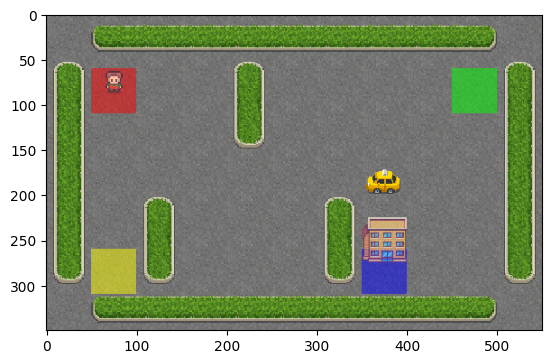

State: 263
Action: 3
Reward: -1
Done: False
Action  0 : state  363  reward:  -1  Solved: False
Action  1 : state  163  reward:  -1  Solved: False
Action  2 : state  283  reward:  -1  Solved: False
Action  3 : state  243  reward:  -1  Solved: False
Action  4 : state  263  reward:  -10  Solved: False
Action  5 : state  263  reward:  -10  Solved: False


In [17]:
import ipywidgets as widgets
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.display import clear_output

# Funktion, die ausgeführt wird, wenn ein Button geklickt wird:
def on_button_clicked(button):
    #print(f"{button.description} wurde geklickt!")
    i=0
    if button==button1:
        i=1
    if button==button2:
        i=0
    if button==button3:
        i=3
    if button==button4:
        i=2
    if button==button5:
        i=4
    if button==button6:
        i=5
    next_state, reward, done, info,a = env.step(int(i))
    display.clear_output(wait=True)
    img = plt.imshow(env.render()) # only call this once
    display.display(buttons_hbox)
    plt.show()
   

    print("State:", next_state)
    print("Action:", i)
    print("Reward:", reward)
    print("Done:", done)
    #print("Info:", info)
    
    for key, value in env.P[next_state].items():
        print("Action ", key, ": state ", value[0][1], " reward: ",value[0][2], " Solved:",value[0][3])
    

# Erstelle die beiden Buttons:
button1 = widgets.Button(description="Up")
button2 = widgets.Button(description="Down")
button3 = widgets.Button(description="Left")
button4 = widgets.Button(description="Right")
button5 = widgets.Button(description="Pick")
button6 = widgets.Button(description="Drop")

# Weise die Callback-Funktion jedem Button zu:
button1.on_click(lambda b: on_button_clicked(b))
button2.on_click(lambda b: on_button_clicked(b))
button3.on_click(lambda b: on_button_clicked(b))
button4.on_click(lambda b: on_button_clicked(b))
button5.on_click(lambda b: on_button_clicked(b))
button6.on_click(lambda b: on_button_clicked(b))

# Gruppiere die Buttons mit HBox:
buttons_hbox = widgets.HBox([button1, button2,button3,button4,button5,button6])

# Zeige die Gruppierung an:
display.display(buttons_hbox)
img = plt.imshow(env.render()) # only call this once
#env.render()

Versuchen wir zunächst eine Brute Force Ansatz

In [20]:
from time import sleep

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation


done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info,a = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Timesteps taken: 952
Penalties incurred: 291


Visualisieren der Lösung

In [22]:
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        env.s = frame['state']
        #print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        #env.render()
        img = plt.imshow(env.render()) # only call this once
        plt.show()
        sleep(.1)
        
print_frames(frames)

Timestep: 27
State: 143
Action: 3
Reward: -1


KeyboardInterrupt: 

Nun mittels Q-Learning Algorithmus

**Q(s,a)= (1 - α) * Q(s,a) + α * [r + γ * max Q(s',a')]**

- Q(s,a): der erwartete Nutzen (engl. "expected utility") bei Auswahl der Aktion 'a' im Zustand 's'
- α: der Lernrateparameter (engl. "learning rate parameter"), der bestimmt, inwieweit neue Informationen den bisherigen Q-Wert beeinflussen sollen
- r: die Belohnung (engl. "reward") nach der Wahl der Aktion 'a' im Zustand 's'
- γ: der Abschlagfaktor (engl. "discount factor"), der bestimmt, wie wichtig zukünftige Belohnungen im Vergleich zu aktuellen Belohnungen sind
- max Q(s',a'): der maximale erwartete Nutzen, den man erhält, wenn man eine Aktion 'a'' im nächsten Zustand 's'' wählt.

Dazu brauchen wir eine Arrays [states][actions] also eine Arrays der Größe 500x6

In [42]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [43]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: total: 2min 7s
Wall time: 2min 7s


In [44]:
q_table[328]

array([ -2.4108326 ,  -2.27325184,  -2.41469326,  -2.36120189,
       -10.67724437,  -9.93522239])

Testen des Agenten mit der berechneten QTable

In [49]:
epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

env.reset()

done = False

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 12
Penalties incurred: 0


In [51]:
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        env.s = frame['state']
        #print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        env.render()
        sleep(.5)
        
print_frames(frames)

Timestep: 12
State: 410
Action: 5
Reward: 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [3]:
import gym
import numpy as np
from PIL import Image

# Erstelle die Cart-Pole Umgebung
env = gym.make('CartPole-v1')

# Setze die Umgebung zurück
observation = env.reset()

# Definiere die Funktion zum Rendern der Umgebung als RGB-Array
def render_env(env):
    # Rendere die Umgebung
    img = env.render(mode='rgb_array')

    # Konvertiere das Bild in ein Numpy-Array
    img = np.array(img)

    return img

# Rendere einige Frames der Umgebung und zeige sie an
for i in range(3):
    # Rendere die Umgebung
    img = render_env(env)

    # Zeige das gerenderte Bild an
    im = Image.fromarray(img)
    im.show()

    # Führe eine zufällige Aktion aus
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    # Breche die Schleife ab, wenn das Spiel vorbei ist
    if done:
        break


ImportError: 
    Cannot import pyglet.
    HINT: you can install pyglet directly via 'pip install pyglet'.
    But if you really just want to install all Gym dependencies and not have to think about it,
    'pip install -e .[all]' or 'pip install gym[all]' will do it.
    

In [16]:
import gym
from gym import wrappers
from gym import envs
import numpy as np 
#import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import time
import os

c:\Users\jtutt\anaconda3\envs\py38\lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(9)


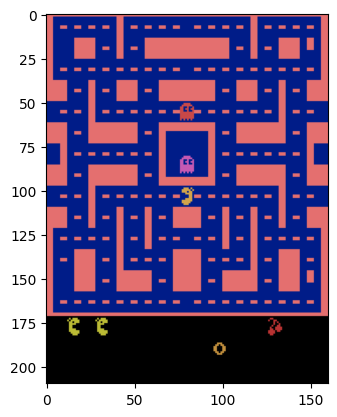

In [5]:
env = gym.make("MsPacmanNoFrameskip-v4",render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Discrete(16)
Action space: Discrete(4)


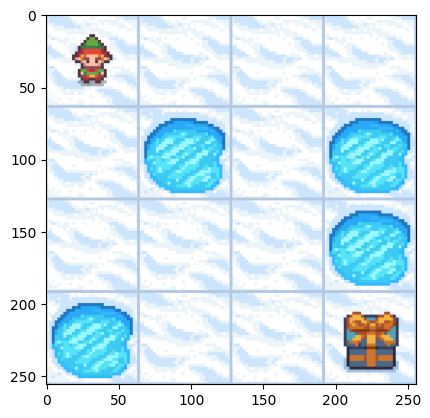

In [40]:
env = gym.make("FrozenLake-v1",render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(6)


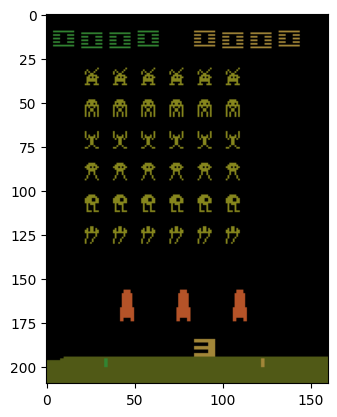

In [23]:
env = gym.make("SpaceInvaders-v0",render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [1]:
import gymnasium as gym
from gymnasium.utils.play import play

env = gym.make("CartPole-v1", render_mode="rgb_array")
play(env, keys_to_action={"a": 0, "d": 1}, fps=2)

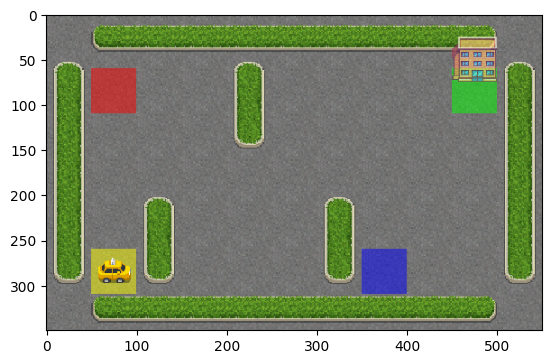

In [21]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
env.reset()
img = plt.imshow(env.render()) # only call this once
for _ in range(100):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)